In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [4]:
train = pd.set_option("display.max_rows",500)
train = pd.set_option("display.max_columns",None)
train = pd.read_csv("train.csv")
test = pd.set_option("display.max_columns",None)
test = pd.set_option("display.max_rows",500)
test = pd.read_csv("test.csv")

No Null values in the trainset

In [5]:
train.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

<AxesSubplot:>

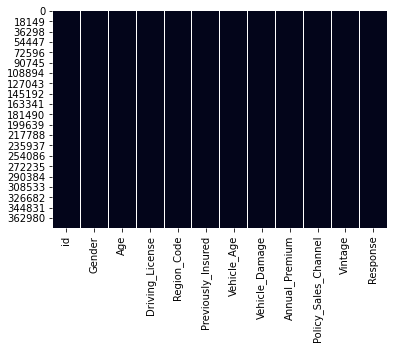

In [6]:
sns.heatmap(train.isna(),cbar=False)

Highly imbalanced dataset, hence shall use SMOTE for oversampling

In [7]:
train.Response.value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [8]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [9]:
def delete_id(dataset1,dataset2,column_name):
    dataset1.drop(column_name,axis=1,inplace=True)
    dataset2.drop(column_name,axis=1,inplace=True)
delete_id(train,test,"id")

In [10]:
get_dummies_rows = ["Gender","Vehicle_Age"]
train_get_dummies = pd.get_dummies(train[get_dummies_rows],drop_first=True)
test_get_dummies = pd.get_dummies(test[get_dummies_rows],drop_first=True)
train = pd.concat([train,train_get_dummies],axis=1)
test = pd.concat([test,test_get_dummies],axis=1)
train = train.drop(get_dummies_rows,axis=1)
test = test.drop(get_dummies_rows,axis=1)

In [11]:
Vehicle_Damage_encoding = {"Yes":1,"No":0}
train["Vehicle_Damage"] = train.Vehicle_Damage.map(Vehicle_Damage_encoding)
test["Vehicle_Damage"] = test.Vehicle_Damage.map(Vehicle_Damage_encoding)

In [12]:
X = train.drop(["Response"],axis=1)
y = train.Response

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
train_oversample = SMOTE()

In [15]:
X_oversmple,y_oversample = train_oversample.fit_resample(X,y)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,plot_roc_curve,plot_precision_recall_curve
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler,Normalizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [17]:
train

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,44,1,28.0,0,1,40454.0,26.0,217,1,1,0,1
1,76,1,3.0,0,0,33536.0,26.0,183,0,1,0,0
2,47,1,28.0,0,1,38294.0,26.0,27,1,1,0,1
3,21,1,11.0,1,0,28619.0,152.0,203,0,1,1,0
4,29,1,41.0,1,0,27496.0,152.0,39,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,0,30170.0,26.0,88,0,1,0,0
381105,30,1,37.0,1,0,40016.0,152.0,131,0,1,1,0
381106,21,1,30.0,1,0,35118.0,160.0,161,0,1,1,0
381107,68,1,14.0,0,1,44617.0,124.0,74,0,0,0,1


<AxesSubplot:>

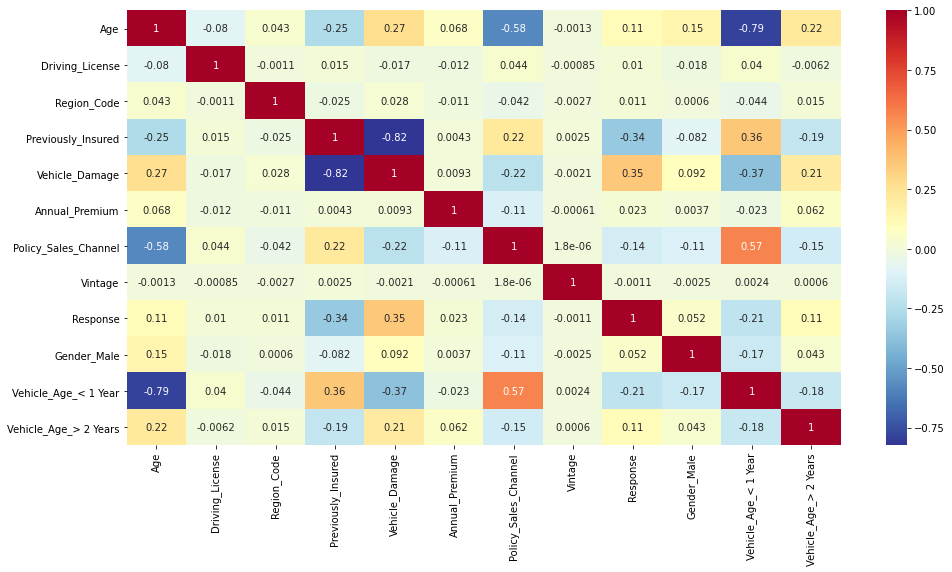

In [18]:
plt.figure(figsize=[16,8])
sns.heatmap(train.corr(),annot=True,cmap="RdYlBu_r")

In [19]:
X_oversmple.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
count,668798.000000,668798.000000,668798.000000,668798.000000,668798.000000,668798.000000,668798.000000,668798.000000,668798.000000,668798.000000,668798.000000
mean,40.559229,0.998002,26.605967,0.261113,0.700833,31015.099343,103.139497,154.193463,0.470226,0.270759,0.030849
std,13.769186,0.044650,12.047062,0.439242,0.457893,17896.046531,55.626349,83.131947,0.499113,0.444352,0.172910
min,20.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000,0.000000,0.000000
25%,28.000000,1.000000,18.000000,0.000000,0.000000,24573.000000,26.000000,82.000000,0.000000,0.000000,0.000000
50%,41.000000,1.000000,28.000000,0.000000,1.000000,32213.792839,124.000000,154.000000,0.000000,0.000000,0.000000
75%,49.000000,1.000000,33.045635,1.000000,1.000000,40268.000000,152.000000,226.000000,1.000000,1.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,1.000000,540165.000000,163.000000,299.000000,1.000000,1.000000,1.000000


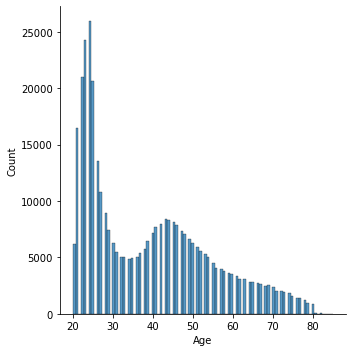

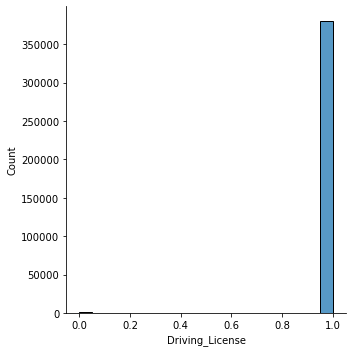

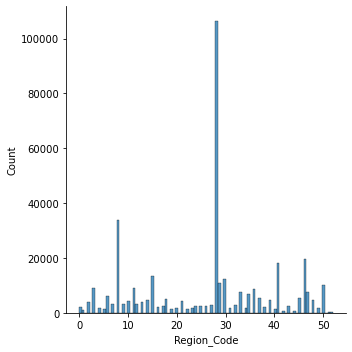

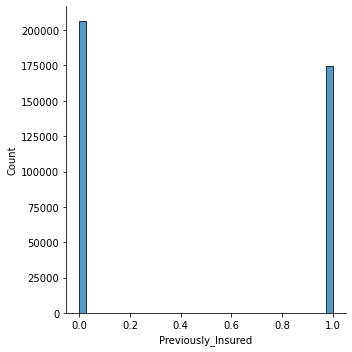

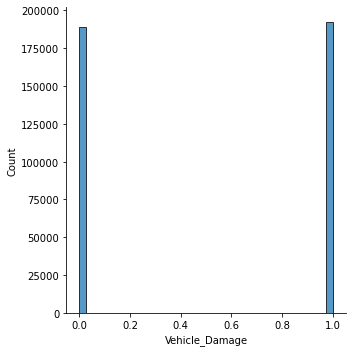

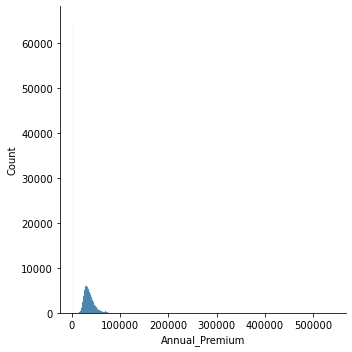

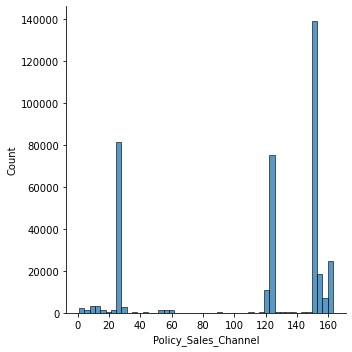

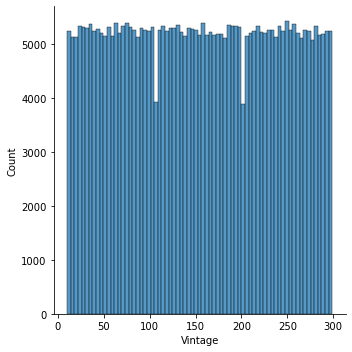

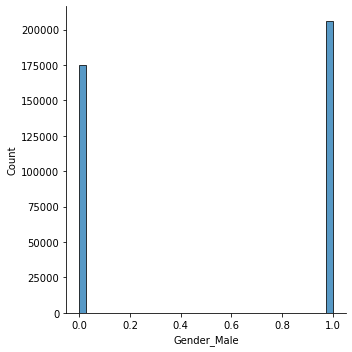

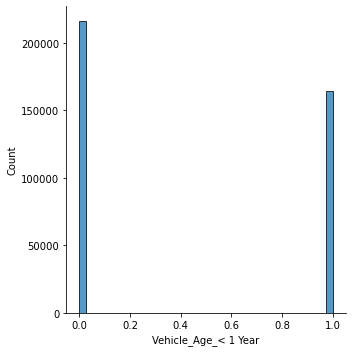

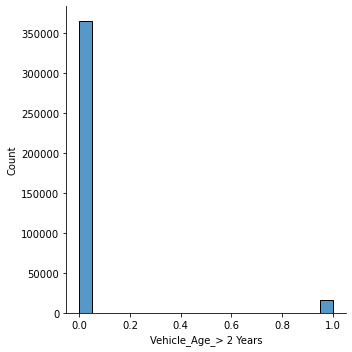

In [20]:
for x in X_oversmple.columns:
    
    sns.displot(x=x,data=train)
    

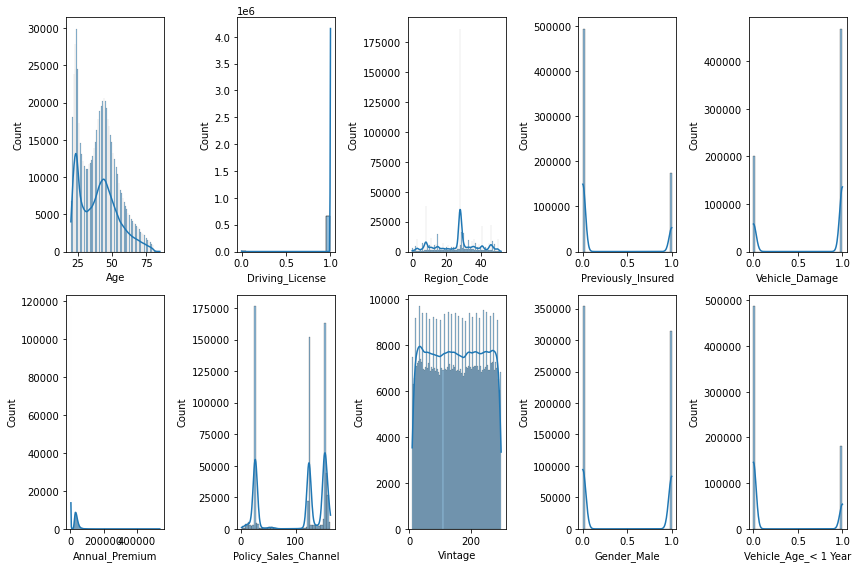

In [21]:
nrows=2
ncols=5


fig,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=[12,8])


cols=X_oversmple.columns
Index=0

for i in range(nrows):
    for j in range(ncols):
        sns.histplot(X_oversmple[cols[Index]],kde=True,ax=ax[i][j])
        Index = Index + 1
plt.tight_layout()

In [22]:
import warnings
warnings.filterwarnings("ignore")

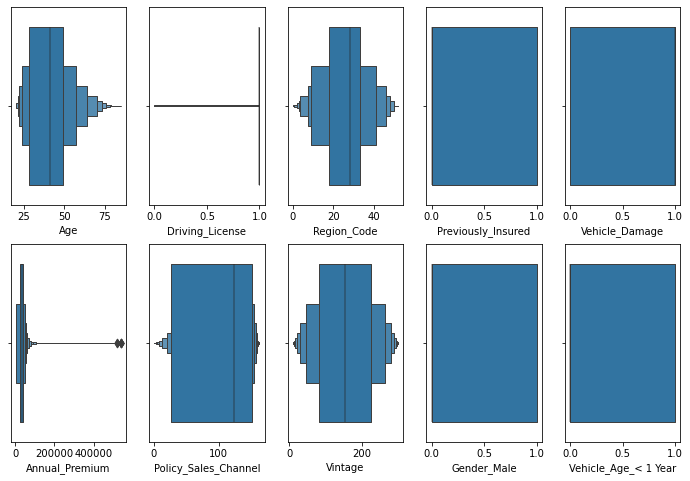

In [23]:
nrows=2
ncols=5

fig,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=[12,8],)

cols=X_oversmple.columns
Index=0

for i in range(nrows):
    for j in range(ncols):
        sns.boxenplot(X_oversmple[cols[Index]],ax=ax[i][j])
        Index = Index + 1
#plt.tight_layout()

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X_oversmple,y_oversample,test_size=0.25,random_state=777)

In [25]:
columns = X_train.columns
Normalization_pipe = Pipeline(steps=[
    ("Normalization",Normalizer())
])

Normalization_ColumnTransformer = ColumnTransformer(transformers=[
    ("Normalization",Normalization_pipe,columns)
])

In [26]:
Classifier_pipe = Pipeline(steps=[
    ("classifier",Normalization_ColumnTransformer),
    ("model",RandomForestClassifier())
])


Classifier_pipe.fit(X_train,y_train)
y_pred = Classifier_pipe.predict(X_test)
y_pred_prob = Classifier_pipe.predict_proba(X_test)
Accuracy_score = accuracy_score(y_test,y_pred)
Classifiction_report = classification_report(y_test,y_pred)
Confusion_matrix = confusion_matrix(y_test,y_pred)
ROC_AUC = roc_auc_score(y_test,y_pred)
print("Accuracy Score is:", Accuracy_score)
print("Classifiction_report is:","\n", Classifiction_report)
print("Confusion_matrix is:","\n", Confusion_matrix )
print("ROC_AUC Score is:", "\n", ROC_AUC)


Accuracy Score is: 0.8688157894736842
Classifiction_report is: 
               precision    recall  f1-score   support

           0       0.93      0.80      0.86     83460
           1       0.82      0.94      0.88     83740

    accuracy                           0.87    167200
   macro avg       0.88      0.87      0.87    167200
weighted avg       0.88      0.87      0.87    167200

Confusion_matrix is: 
 [[66416 17044]
 [ 4890 78850]]
ROC_AUC Score is: 
 0.868693689246513


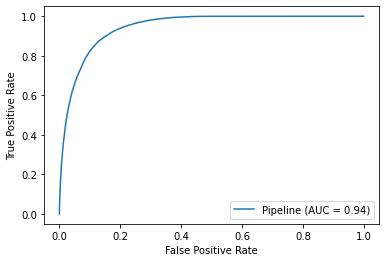

In [28]:
plot_roc_curve(Classifier_pipe,X_test,y_test)

<Figure size 1440x864 with 0 Axes>

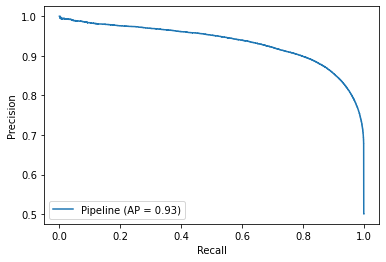

In [36]:
plt.figure(figsize=[20,12])
plot_precision_recall_curve(Classifier_pipe,X_test,y_test)


In [84]:
y_pred_prob[:5]

array([[0.47      , 0.53      ],
       [0.03488333, 0.96511667],
       [0.76034805, 0.23965195],
       [0.07229672, 0.92770328],
       [0.53176953, 0.46823047]])

In [ ]:
Classifier_pipe = Pipeline(steps=[
    ("classifier",Normalization_ColumnTransformer),
    ("model",RandomForestClassifier(criterion="entropy"))
])


Classifier_pipe.fit(X_train,y_train)
y_pred = Classifier_pipe.predict(X_test)
Accuracy_score = accuracy_score(y_test,y_pred)
Classifiction_report = classification_report(y_test,y_pred)
Confusion_matrix = confusion_matrix(y_test,y_pred)
print("Accuracy Score is:", Accuracy_score)
print("Classifiction_report is:","\n", Classifiction_report)
print("Confusion_matrix is:","\n", Confusion_matrix )


In [71]:
Classifier_pipe = Pipeline(steps=[
    ("classifier",Normalization_ColumnTransformer),
    ("model",RandomForestClassifier())
])


Classifier_pipe.fit(X_train,y_train)
y_pred = Classifier_pipe.predict(test)
print(y_pred)
# Accuracy_score = accuracy_score(y_test,y_pred)
# Classifiction_report = classification_report(y_test,y_pred)
# Confusion_matrix = confusion_matrix(y_test,y_pred)
# print("Accuracy Score is:", Accuracy_score)
# print("Classifiction_report is:","\n", Classifiction_report)
# print("Confusion_matrix is:","\n", Confusion_matrix )

[0 1 0 ... 0 0 0]


In [58]:
np.log(X_oversmple.Annual_Premium)

0         10.607921
1         10.420375
2         10.553049
3         10.261826
4         10.221796
            ...    
668793    10.207684
668794    10.058345
668795    11.121159
668796     7.874739
668797    10.126377
Name: Annual_Premium, Length: 668798, dtype: float64

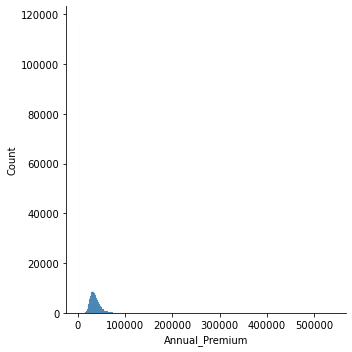

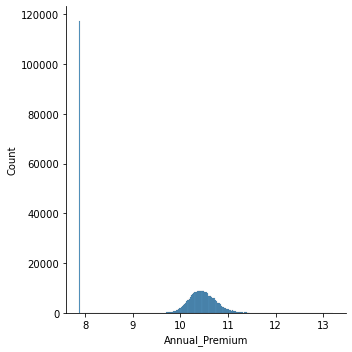

In [66]:

sns.displot(data=X_oversmple,x="Annual_Premium")
sns.displot(np.log(X_oversmple.Annual_Premium))

In [70]:
from scipy.stats import probplot
import pylab

((array([-4.74619258, -4.56347369, -4.46459994, ...,  4.46459994,
          4.56347369,  4.74619258]),
  array([ 7.87473913,  7.87473913,  7.87473913, ..., 13.19962993,
         13.19962993, 13.19962993])),
 (0.8576870270622541, 10.017120890519877, 0.8379046297344712))

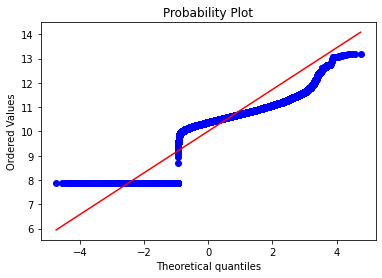

In [72]:
probplot(np.log(X_oversmple.Annual_Premium),plot=pylab)

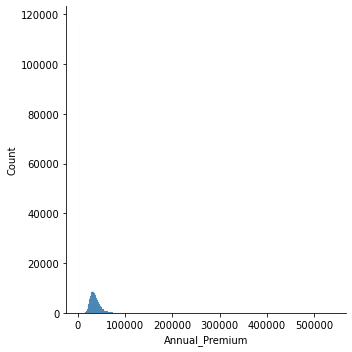

In [74]:
A = sns.displot(data=X_oversmple,x="Annual_Premium")

((array([-4.74619258, -4.56347369, -4.46459994, ...,  4.46459994,
          4.56347369,  4.74619258]),
  array([  2630.,   2630.,   2630., ..., 540165., 540165., 540165.])),
 (16564.38595395828, 30990.750868158644, 0.9298016028226498))

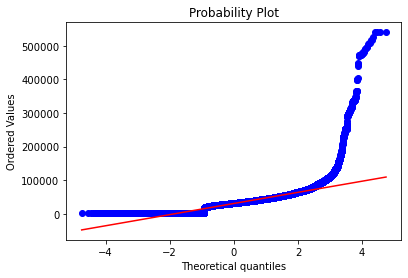

In [76]:
probplot(X_oversmple.Annual_Premium,plot=pylab)